# W4 Friday Project - OOP Calculation of Rental Income (individual project)

In [1]:
from IPython.core.interactiveshell import InteractiveShell # Import this and run it to dislpay all the output
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns

class RentalProperty:
    def __init__(self, purchase_price, rental_income, laundry_income, storage_income, misc_income,
                 taxes, insurance, water_sewer, garbage, electric, gas, hoa_fees, lawn_snow, vacancy,
                 repairs, capex, prop_management, mortgage, down_payment, closing_costs, rehab_budget, 
                 misc_other, ZHVI=None):
        # Initialize the rental property object with the given parameters
        self.purchase_price = purchase_price
        self.rental_income = rental_income
        self.laundry_income = laundry_income
        self.storage_income = storage_income
        self.misc_income = misc_income
        self.taxes = taxes
        self.insurance = insurance
        self.water_sewer = water_sewer
        self.garbage = garbage
        self.electric = electric
        self.gas = gas
        self.hoa_fees = hoa_fees
        self.lawn_snow = lawn_snow
        self.vacancy = vacancy
        self.repairs = repairs
        self.capex = capex
        self.prop_management = prop_management
        self.mortgage = mortgage
        self.down_payment = down_payment
        self.closing_costs = closing_costs
        self.rehab_budget = rehab_budget
        self.misc_other = misc_other
        self.loan = self.purchase_price * 0.80
        self.interest_rate = 2.5 
        self.mort_term = 360.0
        self.down_pmt = self.purchase_price * 0.20
        self.rental_income = self.rental_income
        self.ins = (self.purchase_price / 10000) * 40
        self.vac_all = ZHVI * 0.10 if ZHVI is not None else 0
        self.cl_cost = self.purchase_price*0.035

    @classmethod
    def from_user_input(cls):
        print("Enter the property details:")

        def get_float_input(prompt):
            while True:
                try:
                    value = float(input(prompt))
                    return value
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        purchase_price = get_float_input("Purchase price of the property: ")
        rental_income = get_float_input("Monthly rental income: ")
        laundry_income = get_float_input("Income from laundry facilities: ")
        storage_income = get_float_input("Income from storage units: ")
        misc_income = get_float_input("Miscellaneous income: ")

        taxes = get_float_input("Monthly property taxes: ")
        insurance = get_float_input("Monthly insurance costs: ")
        water_sewer = get_float_input("Monthly water and sewer charges: ")
        garbage = get_float_input("Monthly garbage disposal charges: ")
        electric = get_float_input("Monthly electric bill: ")
        gas = get_float_input("Monthly gas bill: ")
        hoa_fees = get_float_input("Monthly HOA fees: ")
        lawn_snow = get_float_input("Monthly lawn care and snow removal costs: ")
        vacancy = get_float_input("Estimated monthly vacancy rate: ")
        repairs = get_float_input("Estimated monthly repair costs: ")
        capex = get_float_input("Monthly capital expenditure reserve: ")
        prop_management = get_float_input("Monthly property management fees: ")

        mortgage = get_float_input("Monthly mortgage payment: ")
        down_payment = get_float_input("Initial down payment made on the property: ")
        closing_costs = get_float_input("Closing costs associated with purchasing the property: ")
        rehab_budget = get_float_input("Budget for property rehabilitation or renovation: ")
        misc_other = get_float_input("Miscellaneous other expenses or costs: ")

        ZHVI = input("Enter ZHVI value (optional, press Enter to skip): ")
        try:
            ZHVI = float(ZHVI) if ZHVI else None
        except ValueError:
            print("Invalid ZHVI value. Skipping ZHVI.")
            ZHVI = None

        return cls(purchase_price, rental_income, laundry_income, storage_income, misc_income,
                   taxes, insurance, water_sewer, garbage, electric, gas, hoa_fees, lawn_snow, vacancy,
                   repairs, capex, prop_management, mortgage, down_payment, closing_costs, rehab_budget, misc_other, ZHVI)


    def calculate_total_monthly_income(self):
        return self.rental_income + self.laundry_income + self.storage_income + self.misc_income

    def calculate_total_monthly_expenses(self):
        return self.taxes + self.insurance + self.water_sewer + self.garbage + self.electric + self.gas + \
               self.hoa_fees + self.lawn_snow + self.vacancy + self.repairs + self.capex + \
               self.prop_management + self.mortgage

    def calculate_cash_flow(self):
        total_monthly_income = self.calculate_total_monthly_income()
        total_monthly_expenses = self.calculate_total_monthly_expenses()
        return (total_monthly_income - total_monthly_expenses) * 12

    def calculate_cash_on_cash_return(self):
        total_investment_cost = self.down_payment + self.closing_costs + self.rehab_budget + self.misc_other
        annual_cash_flow = self.calculate_cash_flow()
        return (annual_cash_flow / total_investment_cost) * 100
    
    @staticmethod
    def handle_api_response(response):
        if response.status_code == 200:  # Assuming a successful response
            headers = response.headers
            for header, value in headers.items():
                print(f"{header}: {value}")
        
            data = response.json()
            # Process the response data as needed
            # Example: Access specific fields from the response
            content_type = data.get("content-type")
            date = data.get("date")
            server = data.get("server")
            # Print or use the retrieved data
        else:
            print(f"API request failed with status code: {response.status_code}")
            # Handle the error case here
            
    @staticmethod
    def make_api_request(url):
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for HTTP errors (status code >= 400)
            return response
        except requests.RequestException as e:
            print(f"An error occurred during the API request: {str(e)}")
            # Handle the error case here
    
    def get_api_data(self, url):
        response = self.make_api_request(url)
        self.handle_api_response(response)
        
    def visualize_api_data(self, data):
        if data is None or not isinstance(data, dict):
            print("Invalid API data. Cannot visualize.")
            return

        keys = list(data.keys())
        values = list(data.values())

        plt.figure(figsize=(8, 6))
        sns.barplot(x=values, y=keys, palette="viridis")
        plt.title("API Data")
        plt.xlabel("Value")
        plt.show()


    def visualize_results(self):
        labels = ["Total Monthly Income", "Total Monthly Expenses", "Annual Cash Flow", "Cash on Cash Return"]
        values = [
            self.calculate_total_monthly_income(),
            self.calculate_total_monthly_expenses(),
            self.calculate_cash_flow(),
            self.calculate_cash_on_cash_return()
        ]

        plt.figure(figsize=(8, 6))
        sns.barplot(x=values, y=labels, palette="viridis")
        plt.title("Financial Metrics")
        plt.xlabel("Amount ($)")
        plt.show()
        
    def calculate_roi(self, sale_price):
        roi = (sale_price - (self.purchase_price + self.repairs + self.cl_cost)) / (self.purchase_price + self.repairs + self.cl_cost)
        return roi
    
    def calculate_cash_on_cash_return(self):
        mort_pmt = self.loan * ((self.interest_rate/12) * (1 + self.interest_rate/12)**self.mort_term) / ((1 + self.interest_rate/12)**self.mort_term - 1)
        cash_flow = (12 * self.rental_income - (mort_pmt + self.ins + self.vac_all)) / (self.down_pmt + self.cl_cost)
        return cash_flow

Enter the property details:
Purchase price of the property: 1
Monthly rental income: 1
Income from laundry facilities: 1
Income from storage units: 1
Miscellaneous income: 1
Monthly property taxes: 1
Monthly insurance costs: 1
Monthly water and sewer charges: 1
Monthly garbage disposal charges: 1
Monthly electric bill: 1
Monthly gas bill: 1
Monthly HOA fees: 1
Monthly lawn care and snow removal costs: 1
Estimated monthly vacancy rate: 1
Estimated monthly repair costs: 1
Monthly capital expenditure reserve: 1
Monthly property management fees: 1
Monthly mortgage payment: 1
Initial down payment made on the property: 1
Closing costs associated with purchasing the property: 1
Budget for property rehabilitation or renovation: 1
Miscellaneous other expenses or costs: 1
Enter ZHVI value (optional, press Enter to skip): 1
Total Monthly Income: $4.00
Total Monthly Expenses: $13.00
Annual Cash Flow: $-108.00
Cash on Cash Return: 49.91%


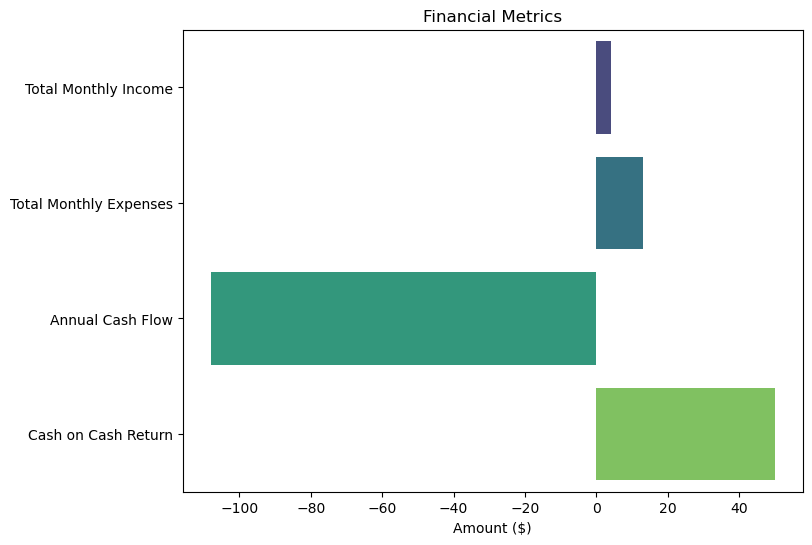

Content-Encoding: gzip
Accept-Ranges: bytes
Age: 123072
Cache-Control: max-age=604800
Content-Type: text/html; charset=UTF-8
Date: Fri, 16 Jun 2023 19:40:04 GMT
Expires: Fri, 23 Jun 2023 19:40:04 GMT
Last-Modified: Thu, 15 Jun 2023 09:28:52 GMT
Server: ECS (cha/8120)
Vary: Accept-Encoding
X-Cache: 404-HIT
Content-Length: 648


In [4]:
# Prompt the user for input and create the rental property object
property1 = RentalProperty.from_user_input()

# Calculate the financial metrics
try:
    total_monthly_income = property1.calculate_total_monthly_income()
    total_monthly_expenses = property1.calculate_total_monthly_expenses()
    cash_flow = property1.calculate_cash_flow()
    cash_on_cash_return = property1.calculate_cash_on_cash_return()
except ZeroDivisionError:
    print("Error: Division by zero occurred during calculation. Please check your input values.")
    exit()

# Print the results
print(f"Total Monthly Income: ${total_monthly_income:.2f}")
print(f"Total Monthly Expenses: ${total_monthly_expenses:.2f}")
print(f"Annual Cash Flow: ${cash_flow:.2f}")
print(f"Cash on Cash Return: {cash_on_cash_return:.2f}%")

# Visualize the results
property1.visualize_results()

# Make an API request and handle the response
api_url = "https://example.com/api/endpoint"  # Replace with the actual API endpoint URL
property1.get_api_data(api_url)

# Portfolio

Let's create a "Portfolio" class that can calculate aggregate financial metrics, such as the overall portfolio cash flow, return on investment, or generate reports for the entire portfolio.

In [6]:
class Portfolio:
    def __init__(self):
        self.properties = []

    def add_property(self, property):
        self.properties.append(property)

    def calculate_portfolio_cash_flow(self):
        total_cash_flow = sum(property.calculate_cash_flow() for property in self.properties)
        return total_cash_flow

    def calculate_portfolio_roi(self):
        total_investment = sum(property.down_payment + property.closing_costs + property.rehab_budget + property.misc_other for property in self.properties)
        total_cash_flow = self.calculate_portfolio_cash_flow()
        return (total_cash_flow / total_investment) * 100

    def generate_portfolio_report(self):
        print("Portfolio Report")
        print("================")
        print("Properties:")
        for index, property in enumerate(self.properties):
            print(f"Property {index + 1}:")
            print(f"  Purchase Price: ${property.purchase_price}")
            print(f"  Cash Flow: ${property.calculate_cash_flow():.2f}")
            print()

        total_cash_flow = self.calculate_portfolio_cash_flow()
        total_roi = self.calculate_portfolio_roi()

        print("Aggregate Metrics:")
        print(f"  Total Cash Flow: ${total_cash_flow:.2f}")
        print(f"  Return on Investment (ROI): {total_roi:.2f}%")


Example usage:

In [7]:
# Create a portfolio object
portfolio = Portfolio()

# Add rental properties to the portfolio
property1 = RentalProperty.from_user_input()
property2 = RentalProperty.from_user_input()
portfolio.add_property(property1)
portfolio.add_property(property2)

# Calculate portfolio financial metrics
portfolio_cash_flow = portfolio.calculate_portfolio_cash_flow()
portfolio_roi = portfolio.calculate_portfolio_roi()

# Generate portfolio report
portfolio.generate_portfolio_report()


Enter the property details:
Purchase price of the property: 1
Monthly rental income: 1
Income from laundry facilities: 1
Income from storage units: 1
Miscellaneous income: 1
Monthly property taxes: 1
Monthly insurance costs: 1
Monthly water and sewer charges: 1
Monthly garbage disposal charges: 1
Monthly electric bill: 1
Monthly gas bill: 1
Monthly HOA fees: 1
Monthly lawn care and snow removal costs: 1
Estimated monthly vacancy rate: 1
Estimated monthly repair costs: 1
Monthly capital expenditure reserve: 1
Monthly property management fees: 1
Monthly mortgage payment: 1
Initial down payment made on the property: 1
Closing costs associated with purchasing the property: 1
Budget for property rehabilitation or renovation: 1
Miscellaneous other expenses or costs: 1
Enter ZHVI value (optional, press Enter to skip): 1
Enter the property details:
Purchase price of the property: 1
Monthly rental income: 1
Income from laundry facilities: 1
Income from storage units: 1
Miscellaneous income: 1
M

# API Integration test

Once we get an API key, we can use pyzillow for access to real estate information.

We can use a sample API response to test out the ways of retrieving information.

Source (copy+pasted from the source) : https://rapidapi.com/s.mahmoud97/api/zillow56

"""

Access US and CA property data in JSON, CSV, or Excel formats. Search listings, compare zestimate home values, and discover agent details. US and CA real estate data. Search millions of for-sale and rental listings by address, neighborhood, city, or ZIP code, compare Zestimate home values. Get agents details and their listings. Now offering data retrieval in JSON, CSV, and XLS formats.

"""

# Visualizing and Feature Engineering from Sample Rental Prices

Let's read through some sample input data of the Zillow Home index: 

Copy+pasted:

"""
Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure.

Zillow publishes top-tier ZHVI (\\$, typical value for homes within the 65th to 95th percentile range for a given region) and bottom-tier ZHVI (\\$, typical value for homes within the 5th to 35th percentile range for a given region).

Zillow also publishes ZHVI for all single-family residences (\\$, typical value for all single-family homes in a given region), for condo/coops (\\$), for all homes with 1, 2, 3, 4 and 5+ bedrooms (\\$), and the ZHVI per square foot ($, typical value of all homes per square foot calculated by taking the estimated home value for each home in a given region and dividing it by the home’s square footage).

Note: Starting with the January 2023 data release, and for all subsequent releases, the full ZHVI time series has been upgraded to harness the power of the neural Zestimate.

More information about what ZHVI is and how it’s calculated is available on this overview page. Here’s a handy ZHVI User Guide for information about properly citing and making calculations with this metric.
"""

Source https://www.zillow.com/research/data/

Let's visualize the data first. Take a peek at data across different regions for the 2000-01-31 date.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas dataframe
df = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Set the option this way so we can observe all the rows
pd.options.display.max_seq_items = 2000

# Get a list of each date.
yearlist = df.drop(["RegionID", "SizeRank", "RegionName", "RegionType","StateName"], axis=1)

# Check the column names in the dataframe. These are the dates we're working with. 
# print(df.columns)

<AxesSubplot:xlabel='RegionName'>

Text(0.5, 1.0, 'Metro Home Value Index')

Text(0.5, 0, 'RegionName')

Text(0, 0.5, 'Home Value Index')

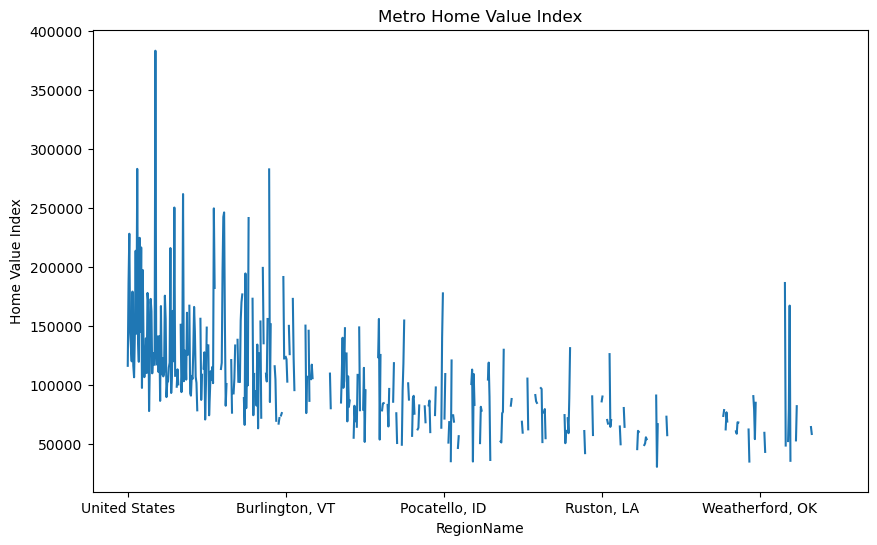

In [9]:
# Select the appropriate column for visualization
column_name = "RegionName"  # Replace with the desired column name from the dataframe

# Visualize the dataframe
df.plot(x="RegionName", y="2000-01-31", figsize=(10, 6), legend=False)
plt.title("Metro Home Value Index")
plt.xlabel(column_name)
plt.ylabel("Home Value Index")
plt.show()


Perform feature engineering by extracting relevant information or creating new features based on your domain knowledge. In this case, the code extracts the year, month, and day from the 'Date' column and stores the ZHVI in 'Value'. 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the CSV file into a Pandas dataframe
df = pd.read_csv("Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Perform feature engineering and create new features
# You can extract relevant information from existing columns or create new columns based on your domain knowledge
# Example: Extract year and month from the column names
date_columns = df.columns[5:]  # Select only the columns starting from index 5

def convert_to_datetime(date_str):
    return pd.to_datetime(date_str, format='%Y-%m-%d')

df[date_columns] = df[date_columns].apply(convert_to_datetime)

df['Year'] = df[date_columns[0]].dt.year  # Extract year from the first selected column
df['Month'] = df[date_columns[0]].dt.month  # Extract month from the first selected column
df['Day'] = df[date_columns[0]].dt.day  # Extract day from the first selected column

# Reshape the date columns into a single column
df_values = df[date_columns].values.reshape(-1)

# Assign the reshaped values to the "Value" column
df['Value'] = df_values[:len(df)]

# Define the feature columns and target column
# Choose the relevant columns from the dataframe that you want to include as features in your predictive model
feature_columns = ['Year', 'Month', 'Day']  # Update with the desired feature columns
target_column = 'Value'  # Update with the target column for prediction

# Remove rows with missing values
df = df.dropna(subset=feature_columns + [target_column])

# Split the data into training and testing sets
X = df[feature_columns]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform any additional preprocessing steps
# Example: Scale the feature values using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/var/folders/2g/mg4_q7jn3qndbhzmw0pnlhg40000gn/T/ipykernel_81220/2632640709.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Year'] = df[date_columns[0]].dt.year  # Extract year from the first selected column
/var/folders/2g/mg4_q7jn3qndbhzmw0pnlhg40000gn/T/ipykernel_81220/2632640709.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Month'] = df[date_columns[0]].dt.month  # Extract month from the first selected column
/var/folders/2g/mg4_q7jn3qndbhzmw0pnlhg40000gn/T/ipykernel_81220/2632640709.py:20: PerformanceWar

In [11]:
# Now you can use the preprocessed data for training your predictive models
# Feed the X_train_scaled and y_train to your chosen machine learning algorithm

# Example: Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

LinearRegression()

In [15]:
from sklearn.metrics import r2_score

# Convert datetime values to Unix timestamps (numerical representation of time)
y_test = y_test.astype(int)  # Assuming y_test contains datetime values
y_pred = y_pred.astype(int)  # Assuming y_pred contains datetime values

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: -0.07252828626790175


## Are we making a good investment? Determine the best places in which to invest.

Let's say we want to figure out what's the most profitable area to invest based on ZHVI information. 

Based on the following criteria, and given the ZHVI and RentalProperty class, determine efficiency of an investment:

1. A minimum of 10% ROI
* ROI = sale price after 5 years-(purchase price+repair+cl_cost) /(purchase price+repair+cl_cost)
* the assumption is that the investor will sell the property after 5 years.
* repair = 20,000
* cl_cost or closing cost = purchase price(0.035)
2. Price to Rent ratio should be between 12 and 25
* PTR = median home price / median annual rent
* PTR ratio indicates how favorable it would be to rent or own a property. Since our investment intention is to rent out the property before the 5-year period, this would be a good measurement to use to gauge the rental market.
* median annual rent will come from the ZHVI.
3. A minimum of 8% Cash-on-Cash return (cash flow)
* COC = (12(rental) -(mort_pmt + ins + vac_all) / (down_pmt + cl_cost)
* mort_pmt or mortgae payment = loan x ((interest rate/12) x (1+interest rate/12))sq(mort_term) / (1+interest rate/12))sq(mort_term)-1)
* loan = purchase price(0.80)
* interest rate = 2.5
* mort_term = 360
* ins = (purchase price/100,00)40
* vac_all = ZHVI(0.10)
* down_pmt = purchase price(0.20)
4. The standard deviation of the rental index should be within the 30% and the 60% quantiles. This is to avoid rental markets with high fluctuation in rent.

This criteria was adapted from this source on Time Analysis with Zillow data (https://collinloo.medium.com/time-analysis-with-zillow-data-1df3dc539fc2) 

In [16]:
import numpy as np

# Example property initialization
property1 = RentalProperty(
    purchase_price=250000, rental_income=2000, laundry_income=0, storage_income=0, misc_income=0,
    taxes=0, insurance=0, water_sewer=0, garbage=0, electric=0, gas=0, hoa_fees=0, lawn_snow=0, vacancy=0,
    repairs=20000, capex=0, prop_management=0, mortgage=0, down_payment=0.20*250000, closing_costs=0,
    rehab_budget=0, misc_other=0, ZHVI=df['Value'].median()
)

# Criteria for efficiency evaluation
min_roi = 0.10
min_cash_on_cash_return = 0.08
min_ptr = 12
max_ptr = 25
min_std_dev_rent = np.percentile(df['Value'].std(), 30)
max_std_dev_rent = np.percentile(df['Value'].std(), 60)

# Example evaluation
roi = property1.calculate_roi(sale_price=300000)
cash_on_cash_return = property1.calculate_cash_on_cash_return()

std_dev_rent = df['Value'].std()

# Check if the investment meets the efficiency criteria
if roi >= min_roi and cash_on_cash_return >= min_cash_on_cash_return and min_ptr <= property1.purchase_price/df['Value'].median() <= max_ptr and min_std_dev_rent <= std_dev_rent <= max_std_dev_rent:
    print("The investment meets the efficiency criteria.")
else:
    print("The investment does not meet the efficiency criteria.")

The investment does not meet the efficiency criteria.
